In [20]:
import numpy as np

# Sample data for multiple cells
np.random.seed(42)
num_cells = 50
true_p = np.random.beta(5, 5, num_cells)
n_tracks = np.random.randint(10, 100, num_cells)
y = np.array([np.random.binomial(n, p) for n, p in zip(n_tracks, true_p)])

# Step 1: Aggregate the Data
y_total = np.sum(y)
n_total = np.sum(n_tracks)

# Step 2: Estimate the Overall Proportion
p_hat = y_total / n_total

# Step 3: Estimate the Variance
var_p_hat = p_hat * (1 - p_hat) / n_total

# Step 4: Use Method of Moments
alpha_emp = p_hat * ((p_hat * (1 - p_hat) / var_p_hat) - 1)
beta_emp = (1 - p_hat) * ((p_hat * (1 - p_hat) / var_p_hat) - 1)

# Print all intermediate results to verify
print(f"Total bound tracks (y_total): {y_total}")
print(f"Total tracks (n_total): {n_total}")
print(f"Overall proportion (p_hat): {p_hat:.4f}")
print(f"Variance of proportion (var_p_hat): {var_p_hat:.8f}")
print(f"Empirical Bayes prior parameters: alpha = {alpha_emp:.2f}, beta = {beta_emp:.2f}")


Total bound tracks (y_total): 1224
Total tracks (n_total): 2552
Overall proportion (p_hat): 0.4796
Variance of proportion (var_p_hat): 0.00009780
Empirical Bayes prior parameters: alpha = 1223.52, beta = 1327.48


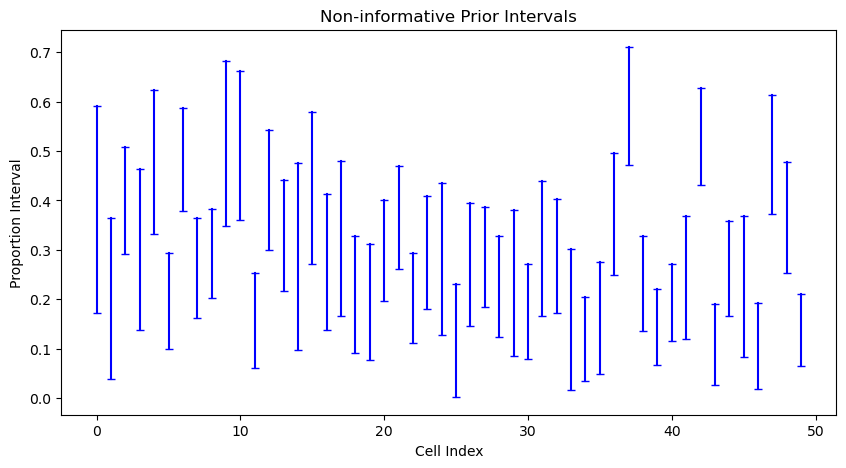

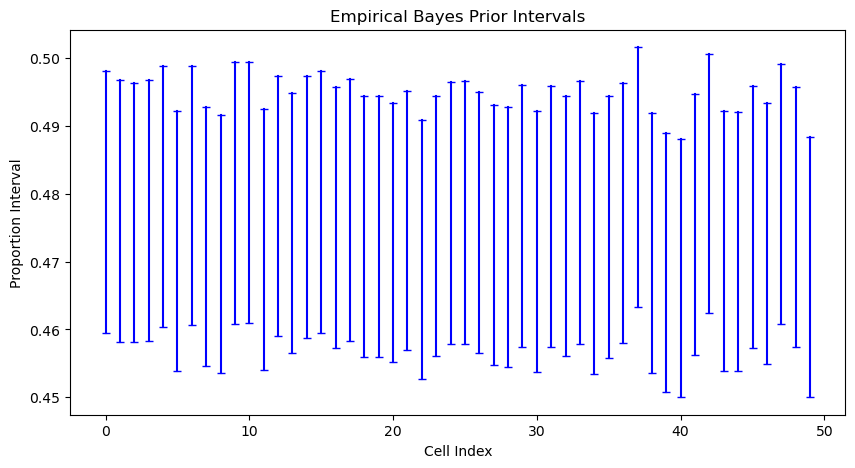

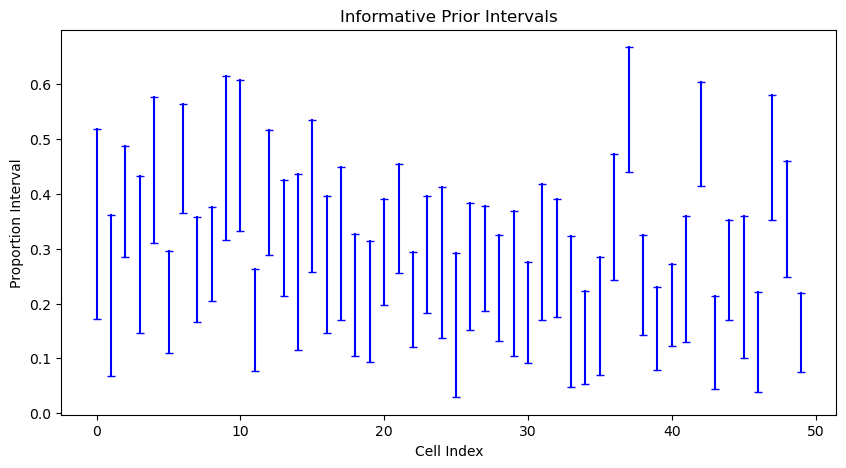

Average width difference between non-informative and empirical Bayes priors: -0.20047217819941518
Average width difference between non-informative and informative priors: -0.015787422872021818
Average width difference between empirical Bayes and informative priors: 0.18468475532739337


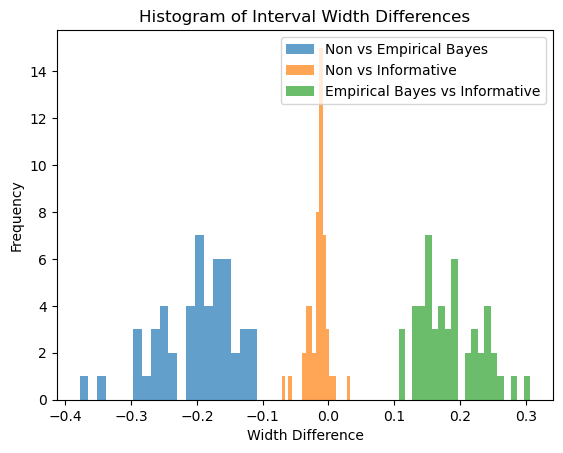

In [21]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Generate Synthetic Data
np.random.seed(42)
num_cells = 50
true_p = np.random.beta(3, 7, num_cells)
n_tracks = np.random.randint(10, 100, num_cells)
y = np.array([np.random.binomial(n, p) for n, p in zip(n_tracks, true_p)])

# Step 2: Define Different Priors
alpha_non = 1
beta_non = 1

# Empirical Bayes Prior (calculated from overall data) 

# Other Prior for comparison (e.g., Informative Prior) 60% bounds
alpha_inf = 3
beta_inf = 7

# Step 3: Function to Calculate Credible Intervals
def beta_credible_interval(y, n, alpha_prior, beta_prior):
    alpha_post = alpha_prior + y
    beta_post = beta_prior + n - y
    lower_bound = stats.beta.ppf(0.025, alpha_post, beta_post)
    upper_bound = stats.beta.ppf(0.975, alpha_post, beta_post)
    return lower_bound, upper_bound

# Calculate intervals for each prior
intervals_non = [beta_credible_interval(y_i, n_i, alpha_non, beta_non) for y_i, n_i in zip(y, n_tracks)]
intervals_emp = [beta_credible_interval(y_i, n_i, alpha_emp, beta_emp) for y_i, n_i in zip(y, n_tracks)]
intervals_inf = [beta_credible_interval(y_i, n_i, alpha_inf, beta_inf) for y_i, n_i in zip(y, n_tracks)]

# Step 4: Analyze Interval Stability
def plot_intervals(intervals, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    for i, (lb, ub) in enumerate(intervals):
        ax.plot([i, i], [lb, ub], color='blue', marker='_')
    ax.set_title(title)
    ax.set_xlabel('Cell Index')
    ax.set_ylabel('Proportion Interval')
    plt.show()

plot_intervals(intervals_non, 'Non-informative Prior Intervals')
plot_intervals(intervals_emp, 'Empirical Bayes Prior Intervals')
plot_intervals(intervals_inf, 'Informative Prior Intervals')

# Assess how the intervals change with different priors
def compare_intervals(intervals1, intervals2):
    width_differences = []
    for (lb1, ub1), (lb2, ub2) in zip(intervals1, intervals2):
        width_diff = (ub2 - lb2) - (ub1 - lb1)
        width_differences.append(width_diff)
    return width_differences

width_diff_non_emp = compare_intervals(intervals_non, intervals_emp)
width_diff_non_inf = compare_intervals(intervals_non, intervals_inf)
width_diff_emp_inf = compare_intervals(intervals_emp, intervals_inf)


print("Average width difference between non-informative and empirical Bayes priors:", np.mean(width_diff_non_emp))
print("Average width difference between non-informative and informative priors:", np.mean(width_diff_non_inf))
print("Average width difference between empirical Bayes and informative priors:", np.mean(width_diff_emp_inf))

# Histogram of width differences
plt.hist(width_diff_non_emp, bins=20, alpha=0.7, label='Non vs Empirical Bayes')
plt.hist(width_diff_non_inf, bins=20, alpha=0.7, label='Non vs Informative')
plt.hist(width_diff_emp_inf, bins=20, alpha=0.7, label='Empirical Bayes vs Informative')
plt.xlabel('Width Difference')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Interval Width Differences')
plt.show()


In [24]:
# step 5: Calculate the Coverage Probability
def coverage_probability(intervals, true_p):
    covered = [lb < p < ub for (lb, ub), p in zip(intervals, true_p)]
    return np.mean(covered)


coverage_non = coverage_probability(intervals_non, true_p)
coverage_emp = coverage_probability(intervals_emp, true_p)
coverage_inf = coverage_probability(intervals_inf, true_p)

print("Coverage Probability for Non-informative Prior:", coverage_non)
print("Coverage Probability for Empirical Bayes Prior:", coverage_emp)
print("Coverage Probability for Informative Prior:", coverage_inf)


Coverage Probability for Non-informative Prior: 0.98
Coverage Probability for Empirical Bayes Prior: 0.04
Coverage Probability for Informative Prior: 0.96


Total bound tracks (y_total): 2329
Total tracks (n_total): 4952
Overall proportion (p_hat): 0.4703
Variance of proportion (var_p_hat): 0.00005031
Empirical Bayes prior parameters: alpha = 2328.53, beta = 2622.47


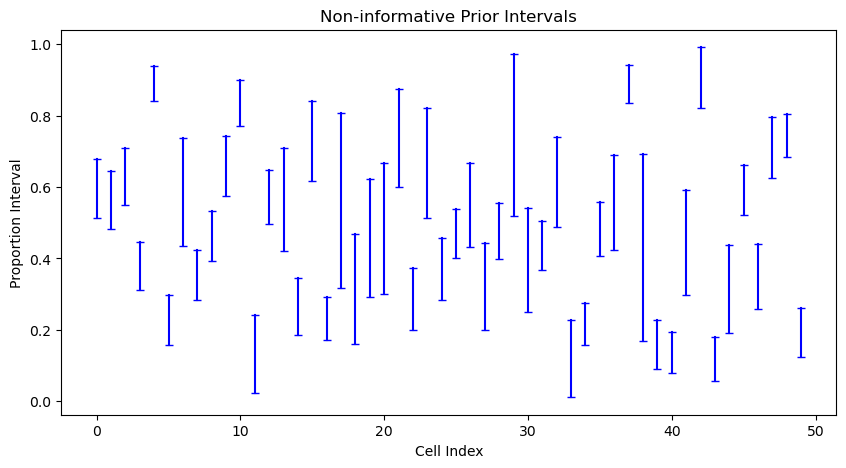

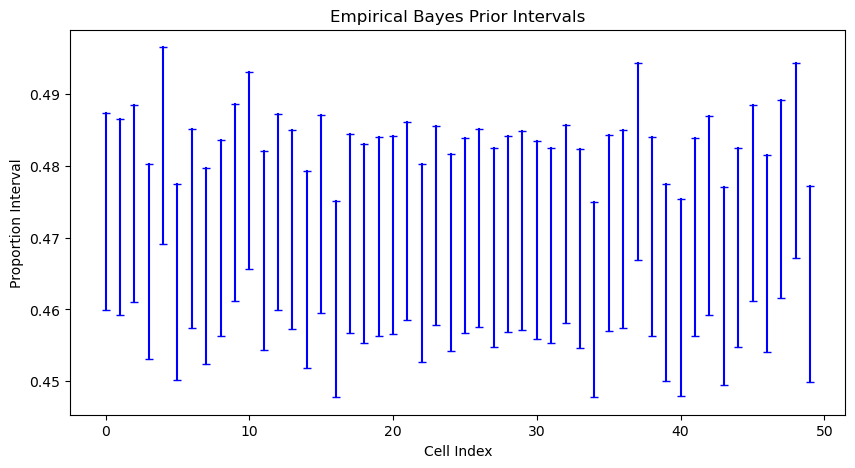

Average width difference between non-informative and empirical Bayes priors: -0.18173549092395166


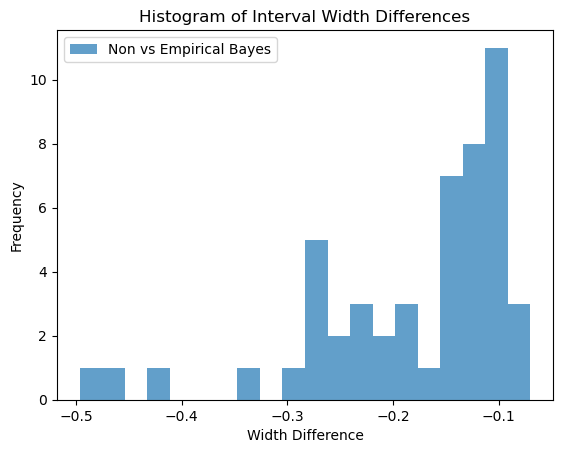

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Step 1: Generate Proportions with Higher Variance
# Use a Beta distribution with lower alpha and beta to increase variance
num_cells = 50
true_p = np.random.beta(2, 2, num_cells)  # Increased variance

# Step 2: Generate Track Counts with Higher Variance
n_tracks = np.random.randint(5, 200, num_cells)  # Wider range for track counts

# Generate observed data based on the generated proportions and track counts
y = np.array([np.random.binomial(n, p) for n, p in zip(n_tracks, true_p)])

# Step 3: Aggregate the Data
y_total = np.sum(y)
n_total = np.sum(n_tracks)

# Step 4: Estimate the Overall Proportion
p_hat = y_total / n_total

# Step 5: Estimate the Variance
var_p_hat = p_hat * (1 - p_hat) / n_total

# Step 6: Use Method of Moments
alpha_emp = p_hat * ((p_hat * (1 - p_hat) / var_p_hat) - 1)
beta_emp = (1 - p_hat) * ((p_hat * (1 - p_hat) / var_p_hat) - 1)

# Print all intermediate results to verify
print(f"Total bound tracks (y_total): {y_total}")
print(f"Total tracks (n_total): {n_total}")
print(f"Overall proportion (p_hat): {p_hat:.4f}")
print(f"Variance of proportion (var_p_hat): {var_p_hat:.8f}")
print(f"Empirical Bayes prior parameters: alpha = {alpha_emp:.2f}, beta = {beta_emp:.2f}")

# Function to Calculate Credible Intervals
def beta_credible_interval(y, n, alpha_prior, beta_prior):
    alpha_post = alpha_prior + y
    beta_post = beta_prior + n - y
    lower_bound = stats.beta.ppf(0.025, alpha_post, beta_post)
    upper_bound = stats.beta.ppf(0.975, alpha_post, beta_post)
    return lower_bound, upper_bound

# Calculate intervals for non-informative and empirical Bayes priors
alpha_non = 1
beta_non = 1

intervals_non = [beta_credible_interval(y_i, n_i, alpha_non, beta_non) for y_i, n_i in zip(y, n_tracks)]
intervals_emp = [beta_credible_interval(y_i, n_i, alpha_emp, beta_emp) for y_i, n_i in zip(y, n_tracks)]

# Plot the intervals for comparison
def plot_intervals(intervals, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    for i, (lb, ub) in enumerate(intervals):
        ax.plot([i, i], [lb, ub], color='blue', marker='_')
    ax.set_title(title)
    ax.set_xlabel('Cell Index')
    ax.set_ylabel('Proportion Interval')
    plt.show()

plot_intervals(intervals_non, 'Non-informative Prior Intervals')
plot_intervals(intervals_emp, 'Empirical Bayes Prior Intervals')

# Assess how the intervals change with different priors
def compare_intervals(intervals1, intervals2):
    width_differences = []
    for (lb1, ub1), (lb2, ub2) in zip(intervals1, intervals2):
        width_diff = (ub2 - lb2) - (ub1 - lb1)
        width_differences.append(width_diff)
    return width_differences

width_diff_non_emp = compare_intervals(intervals_non, intervals_emp)

print("Average width difference between non-informative and empirical Bayes priors:", np.mean(width_diff_non_emp))

# Histogram of width differences
plt.hist(width_diff_non_emp, bins=20, alpha=0.7, label='Non vs Empirical Bayes')
plt.xlabel('Width Difference')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Interval Width Differences')
plt.show()


In [25]:
# Calculate the Coverage Probability
def coverage_probability(intervals, true_p):
    covered = [lb < p < ub for (lb, ub), p in zip(intervals, true_p)]
    return np.mean(covered)

coverage_non = coverage_probability(intervals_non, true_p)
coverage_emp = coverage_probability(intervals_emp, true_p)

print("Coverage Probability for Non-informative Prior:", coverage_non)
print("Coverage Probability for Empirical Bayes Prior:", coverage_emp)


Coverage Probability for Non-informative Prior: 0.98
Coverage Probability for Empirical Bayes Prior: 0.04


In [1]:
import numpy as np
import pymc3 as pm
import matplotlib.pyplot as plt

# Seed for reproducibility
np.random.seed(42)

# Generate synthetic data with higher variance
num_cells = 50
true_p = np.random.beta(2, 2, num_cells)  # Increased variance
n_tracks = np.random.randint(5, 200, num_cells)  # Wider range for track counts
y = np.array([np.random.binomial(n, p) for n, p in zip(n_tracks, true_p)])

# Hierarchical Bayesian Model with PyMC3
with pm.Model() as model:
    # Hyperpriors for the Beta distribution parameters
    alpha = pm.Gamma('alpha', 1, 1)
    beta = pm.Gamma('beta', 1, 1)

    # Prior for each cell's proportion
    p = pm.Beta('p', alpha, beta, shape=num_cells)

    # Likelihood for observed data
    y_obs = pm.Binomial('y_obs', n=n_tracks, p=p, observed=y)

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=False, cores=1)

# Extract posterior samples
alpha_post = trace['alpha']
beta_post = trace['beta']
p_post = trace['p']

# Calculate credible intervals for each cell's proportion
intervals_hierarchical = []
for i in range(num_cells):
    lower_bound = np.percentile(p_post[:, i], 2.5)
    upper_bound = np.percentile(p_post[:, i], 97.5)
    intervals_hierarchical.append((lower_bound, upper_bound))

# Plot the intervals for comparison
def plot_intervals(intervals, title):
    fig, ax = plt.subplots(figsize=(10, 5))
    for i, (lb, ub) in enumerate(intervals):
        ax.plot([i, i], [lb, ub], color='blue', marker='_')
    ax.set_title(title)
    ax.set_xlabel('Cell Index')
    ax.set_ylabel('Proportion Interval')
    plt.show()

plot_intervals(intervals_hierarchical, 'Hierarchical Bayesian Model Intervals')

# Calculate Coverage Probability
def coverage_probability(intervals, true_p):
    covered = [lb < p < ub for (lb, ub), p in zip(intervals, true_p)]
    return np.mean(covered)

coverage_hierarchical = coverage_probability(intervals_hierarchical, true_p)
print("Coverage Probability for Hierarchical Bayesian Model:", coverage_hierarchical)


xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun


CompileError: Command "gcc -Wno-unused-result -Wsign-compare -Wunreachable-code -DNDEBUG -g -fwrapv -O3 -Wall -Wstrict-prototypes -I/Users/ceciliaacosta/miniconda3/envs/cellpose1/include -arch x86_64 -I/Users/ceciliaacosta/miniconda3/envs/cellpose1/include -arch x86_64 -c /var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/tmpk38rp3c9/source.c -o /var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/tmpk38rp3c9/var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/tmpk38rp3c9/source.o -MMD -MF /var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/tmpk38rp3c9/var/folders/sk/v4vrhsvs23x5m4l_yhw9ckjw0000gn/T/tmpk38rp3c9/source.o.d" failed with exit status 1